 - Kaiao Zeng
 - Jinxue Liu
 - Brandon Paw
 - Jason Cruz




#  Intro and Background

## Research Question
*Do people who live in higher elevation cities (in the United States) have decreased rates of heart disease?*

Lower oxygen levels, or thinner air, increases the demand on our cardiovascular system. We have to work harder to breathe in the air. A 2013 International Journal of Obesity study found correlation between high altitude and lower rates of obesity. Elite athletes take advantage of the cardiovascular strain placed on their bodies by altitude and participate in altitude training, to improve their physicality and cardiovascular efficiency. As they become more acclimated to the higher altitude, they gain red blood cells and increase oxygen flow. 

We wanted to examine the potential correlations between heart disease rates and elevation in American cities. We plotted various graphs showing the correlations between heart attack rates with other illnesses, and then plotted elevation against factors such as high blood pressure, cholesterol, and diabetes to search for correlations.

We believe that these examples of high altitude positively impacting cardiovascular health can be examined further, and considered in relation to heart disease. We will examine, wrangle, and visualize datasets containing information about elevation across U.S cities, as well as the rates of heart disease in those cities, and attempt to find a significant correlation.

## Hypothesis

Our hypothesis is that populations in elevated cities will have a lower incidence of heart attacks compared to the norm. People who live in higher elevation cities (in the United States) are more likely to have a decreased likelihood of acquiring heart disease over their lifetime compared to the general American population. In addition, we predict higher elevations have lower occurrance of other similar heart health problems such as depression, obesity, high cholesterol, and high blood pressure.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Datasets

The dataset we used to generate the visualizations below was found from the [Gallup Sharecare Wellbeing Index](https://wellbeingindex.sharecare.com/wp-content/uploads/2017/12/Heart-Attack-Rankings-U.S.-Communities-2016.pdf). This report included varied health statistics relating to different cities and counties (particularly, percentages relating to heart attack, high blood pressure, high cholesterol and more). \n",

## Data Cleaning

However, the report didn't include a downloadable .csv file to make use of, so we had to generate one from the pdf. The process was rather easy: we simply copied the statistics into a .txt file and ran a python script that would format the contents such that each line contained a different community\\city. Unfortunately, another issue arose in that the pdf lists communities/cities that had the same percentages on the same line and delineated them with a non-searchable character. Due to that fact, we had to manually separate the communities/cities so that each could have its own line.

Once this process was finished, we uploaded the .csv into a google sheet so we could add another column for elevation. Once the elevation column was added, we took our finished .csv and began generating the below visualizations.


## Dataset Explanation

The dataset below contains heart attack related statistics for 336 cities (within 47 states) in the U.S. The 'city' and 'state' columns can be used to identify the particular city that has received the given statistics. The 'elevation' column, as mentioned above, was added later in order for us to see if there are any correlations between heart attacks or conditions commonly associated with them (i.e. the 'High Blood Pressure', 'High Cholesterol', and 'Diabetes' columns in particular).

In [2]:
df_h_atk = pd.read_csv("heart_attack_city.csv")
df_avg_elevation = pd.read_csv("avg_elevation.csv")
df_h_atk_elev = pd.read_csv("heart_attack_city.csv")
df_h_atk.head()

,City,State,Percent with Heart Attack,High Blood Pressure,High Cholesterol,Diabetes,Depression,Obesity,Elevation
0,Anchorage,AK,4.3,25.1,16.9,7.7,13.2,26.7,102
1,Huntsville,AL,3.2,32.6,26.6,13.5,12.8,28.2,600
2,Montgomery,AL,3.9,31.4,21.9,12.6,12.7,31.1,240
3,Daphne,AL,4.7,30.1,25.3,13.5,15.1,26.5,157
4,Fairhope,AL,4.7,30.1,25.3,13.5,15.1,26.5,122


In [3]:
len(df_h_atk["State"].unique())

47

In [4]:
def parse_state_code(state_str):
    return state_str[state_str.index("-") + 1:].strip()

In [5]:
df_avg_elevation["State"] = df_avg_elevation["State"].apply(parse_state_code)
df_avg_elevation.head()

,State,Highest point,Highest elevation,Lowest point,Lowest elevation,Mean elevation,Elevation difference
0,AL,Cheaha Mountain,"2,413 feet (735 m)[5]",Gulf of Mexico,0 feet (0 m),500 feet (152 m),"2,413 feet (735 m)"
1,AK,Mount McKinley,"20,320 feet (6,194 m)",Pacific Ocean,0 feet (0 m),"1,900 feet (579 m)","20,320 feet (6,194 m)"
2,AZ,Humphreys Peak,"12,637 feet (3,852 m)[6]",Colorado River,70 feet (21 m),"4,100 feet (1,250 m)","12,567 feet (3,830 m)"
3,AR,Mount Magazine,"2,753 feet (839 m)",Ouachita River,55 feet (17 m),650 feet (198 m),"2,698 feet (822 m)"
4,CA,Mount Whitney,"14,505 feet (4,421 m)[7]",Death Valley,-282 feet (-86 m),"2,900 feet (884 m)","14,776 feet (4,504 m)"


In [6]:
elev_by_state = defaultdict(int)
for index, row in df_avg_elevation.iterrows():
    state_code = row["State"]
    elev = row["Mean elevation"]
    elev_num = int(elev[:elev.index("feet")].replace(",",""))
    elev_by_state[state_code] = elev_num


In [7]:
avg_by_state = defaultdict(list)
avg_bp = defaultdict(list)
avg_cholesterol = defaultdict(list)
avg_diabetes = defaultdict(list)
avg_depression = defaultdict(list)
avg_obesity = defaultdict(list)
for index, row in df_h_atk.iterrows():
    state_code = row["State"]
    avg_by_state[state_code].append(row["Percent with Heart Attack"])
    avg_bp[state_code].append(row["High Blood Pressure"])
    avg_cholesterol[state_code].append(row["High Cholesterol"])
    avg_diabetes[state_code].append(row["Diabetes"])
    avg_depression[state_code].append(row["Depression"])
    avg_obesity[state_code].append(row["Obesity"])


for key in avg_by_state.keys():
    num_avgs = len(avg_by_state[key])
    sum_avgs = sum(avg_by_state[key])
    avg_by_state[key] = [sum_avgs / num_avgs]
    
    num_avgs = len(avg_bp[key])
    sum_avgs = sum(avg_bp[key])
    avg_bp[key] = [sum_avgs / num_avgs]
    
    num_avgs = len(avg_cholesterol[key])
    sum_avgs = sum(avg_cholesterol[key])
    avg_cholesterol[key] = [sum_avgs / num_avgs]
    
    num_avgs = len(avg_diabetes[key])
    sum_avgs = sum(avg_diabetes[key])
    avg_diabetes[key] = [sum_avgs / num_avgs]
    
    num_avgs = len(avg_depression[key])
    sum_avgs = sum(avg_depression[key])
    avg_depression[key] = [sum_avgs / num_avgs]
    
    num_avgs = len(avg_obesity[key])
    sum_avgs = sum(avg_obesity[key])
    avg_obesity[key] = [sum_avgs / num_avgs]
    

    

In [8]:
for state_code, elev in elev_by_state.items():
    avg_by_state[state_code].append(elev)

keys_to_delete = []
for k in avg_by_state:
    if len(avg_by_state[k]) < 2:
        keys_to_delete.append(k)

for key in keys_to_delete:
    del avg_by_state[key]
#     del avg_bp[key]
#     del avg_cholesterol[key]
#     del avg_diabetes[key]
#     del avg_depression[key]
#     del avg_obesity[key]
    
percentage_lst = []
elev_lst = []
data = []
for k in avg_by_state:
    for_state = avg_by_state[k]
    data.append((for_state[0], 
                 avg_bp[k][0], 
                 avg_cholesterol[k][0],
                 avg_diabetes[k][0],
                 avg_depression[k][0],
                 avg_obesity[k][0],
                 for_state[1]))

In [9]:
df = pd.DataFrame(data, columns=[
        "Percentage with Heart Attack", 
        "High Blood Pressure",
        "High Cholesterol", 
        "Diabetes",
        "Depression",
        "Obesity", 
        "Elevation in ft."])
df.head()

,Percentage with Heart Attack,High Blood Pressure,High Cholesterol,Diabetes,Depression,Obesity,Elevation in ft.
0,4.300000,25.100000,16.900000,7.700000,13.200000,26.700000,1900
1,4.625000,32.750000,26.487500,13.987500,15.900000,29.387500,500
2,4.100000,32.742857,24.057143,13.942857,20.614286,32.957143,650
3,4.857143,29.700000,26.371429,12.042857,17.585714,25.642857,4100
4,2.792308,25.482051,21.689744,10.435897,17.064103,25.487179,2900


# Data Visualization/Analysis:

For our data visualization, we are going to be visualizing elevation and heart health related diseases. For clarity and greater detail, we will be first comparing each heart health problems against each other then against elevation.

Text(0, 0.5, 'Elevation in ft.')

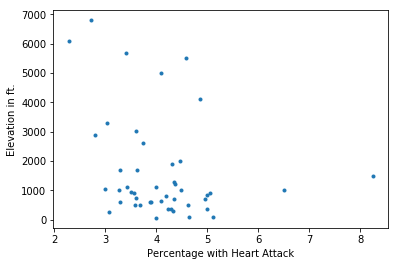

In [10]:
f, ax = plt.subplots()
ax.plot(df['Percentage with Heart Attack'], df['Elevation in ft.'], '.')
ax.set_xlabel('Percentage with Heart Attack')
ax.set_ylabel('Elevation in ft.')

 - This graph shows strong negative correlation Heart Attack percentage and Elevation. 
 - Analysis: There is higher variance in the difference in elevation as heart attack percentage is constrained from 2 to 5      percent. Outliers include: highest percentage of heart attack at 8% at a lower elevation and lowest percentage of heart attack at 2% at a higher elevation. Possible confounds to explain these outliers is that we do not take into account population as well as behavioral habits. 

Text(0, 0.5, 'High Blood Pressure')

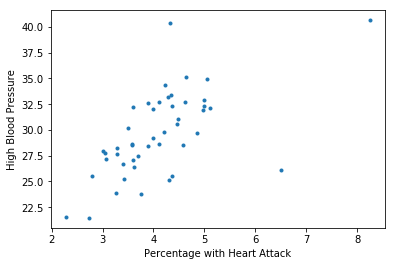

In [11]:
f, ax = plt.subplots()
ax.plot(df['Percentage with Heart Attack'], df['High Blood Pressure'], '.')
ax.set_xlabel('Percentage with Heart Attack')
ax.set_ylabel('High Blood Pressure')

- This graph shows strong positive correlation comparing high blood pressure to heart attack percentage.
- As high blood pressure increases, so does heart attack percentage. Even with the furthest outlier, this remains true. The highest recorded high blood pressure matches with the highest recorded heart attack percentage

Text(0, 0.5, 'High Cholesterol')

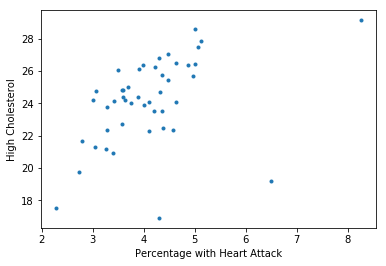

In [12]:
f, ax = plt.subplots()
ax.plot(df['Percentage with Heart Attack'], df['High Cholesterol'], '.')
ax.set_xlabel('Percentage with Heart Attack')
ax.set_ylabel('High Cholesterol')

 - This graph shows strong positive correlation comparing high cholesterol to heart attack percentage
 - As cholesterol increases, so does heart attack percentage. The outliers include: the lowest recorded cholesterol level having a normal percentage of having a heart attack. The highest recorded cholesterol level also recorded the highest chance of having a heart attack

Text(0, 0.5, 'Diabetes')

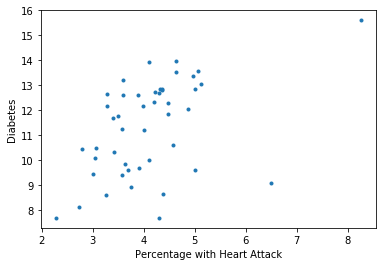

In [13]:
f, ax = plt.subplots()
ax.plot(df['Percentage with Heart Attack'], df['Diabetes'], '.')
ax.set_xlabel('Percentage with Heart Attack')
ax.set_ylabel('Diabetes')

 - This graph shows weak positive correlation between diabetes and heart attack percentage.
 - On average, as diabetes increases, so does heart attack percentage. However, this claim cannot be as conclusive as the previous graphs based on the strength of the correlation alone. The outlier includes having the highest recorded diabetes matching with the highest chance of having a heart attack

Text(0, 0.5, 'Depression')

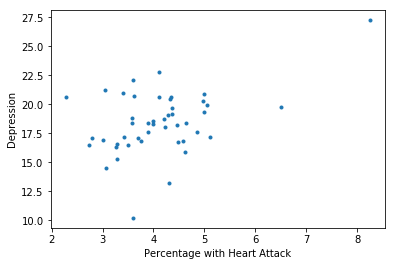

In [14]:
f, ax = plt.subplots()
ax.plot(df['Percentage with Heart Attack'], df['Depression'], '.')
ax.set_xlabel('Percentage with Heart Attack')
ax.set_ylabel('Depression')

 - This graph shows no correlation between depression and heart attack percentage.
 - The outlier in the graph shows that the highest recording of depression matches with the highest chance of having a heart attack. A possible answer to why the correlation is deemed as no correlation is because depression can be a lot more than just leading up to a heart attack.

Text(0, 0.5, 'Obesity')

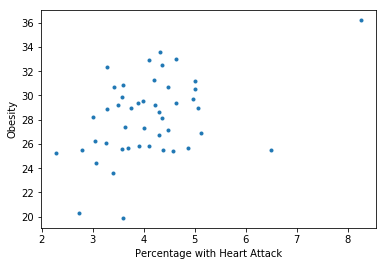

In [15]:
f, ax = plt.subplots()
ax.plot(df['Percentage with Heart Attack'],df['Obesity'], '.')
ax.set_xlabel('Percentage with Heart Attack')
ax.set_ylabel('Obesity')

 - This graph shows no correlation between obesity and heart attack percentage.
 - The outlier of having the highest recored obesity score matched with having the highest chance of having a heart attack. 

In [26]:
df_h_atk_elev.head()

,City,State,Percent with Heart Attack,High Blood Pressure,High Cholesterol,Diabetes,Depression,Obesity,Elevation,Percent with Heart Attack 10
0,Anchorage,AK,4.3,25.1,16.9,7.7,13.2,26.7,102,0.633468
1,Huntsville,AL,3.2,32.6,26.6,13.5,12.8,28.2,600,0.505150
2,Montgomery,AL,3.9,31.4,21.9,12.6,12.7,31.1,240,0.591065
3,Daphne,AL,4.7,30.1,25.3,13.5,15.1,26.5,157,0.672098
4,Fairhope,AL,4.7,30.1,25.3,13.5,15.1,26.5,122,0.672098


In [17]:
def standardize_elevation(elev_str):
    return elev_str.replace("'", "").replace(",", "")

df_h_atk_elev = df_h_atk_elev.dropna()
df_h_atk_elev['Elevation'] = df_h_atk_elev['Elevation'].apply(standardize_elevation)
df_h_atk_elev.head()

,City,State,Percent with Heart Attack,High Blood Pressure,High Cholesterol,Diabetes,Depression,Obesity,Elevation
0,Anchorage,AK,4.3,25.1,16.9,7.7,13.2,26.7,102
1,Huntsville,AL,3.2,32.6,26.6,13.5,12.8,28.2,600
2,Montgomery,AL,3.9,31.4,21.9,12.6,12.7,31.1,240
3,Daphne,AL,4.7,30.1,25.3,13.5,15.1,26.5,157
4,Fairhope,AL,4.7,30.1,25.3,13.5,15.1,26.5,122


 - The next following 6 graphs display elevation by each specific city and not all states are included, some states may display more than one city on each graph.

Text(0, 0.5, 'Elevation')

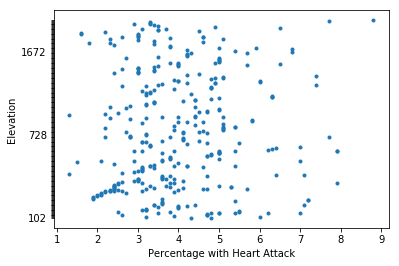

In [18]:
f, ax = plt.subplots()
ax.plot(df_h_atk_elev['Percent with Heart Attack'], df_h_atk_elev['Elevation'], '.')

spacing = 100
visible = ax.yaxis.get_ticklabels()[::spacing]
for label in ax.yaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)
        
ax.set_xlabel('Percentage with Heart Attack')
ax.set_ylabel('Elevation')

 - This graph shows no correlation between each city and heart attack percentage
 - We first plotted out the graph about correlation between each city and heart attack percentage. Unlike what we predicted, there is no direct relationship between these two data according to the scatter plot since the dots are all over the graph. This means every elevation has both low and high percentage of heart attack rate 
(this is under the first graph of elevation and percentage with heart attack)

Text(0, 0.5, 'Elevation')

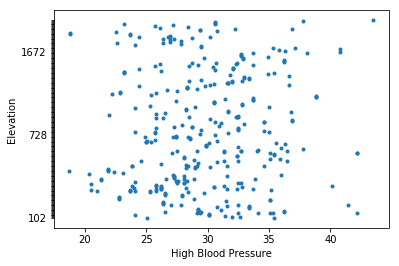

In [19]:
f, ax = plt.subplots()
ax.plot(df_h_atk_elev['High Blood Pressure'], df_h_atk_elev['Elevation'], '.')

spacing = 100
visible = ax.yaxis.get_ticklabels()[::spacing]
for label in ax.yaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)
        
ax.set_xlabel('High Blood Pressure')
ax.set_ylabel('Elevation')

 - This graph shows no correlation between high blood pressure and elevation
 - We tried to plot out another graph shows correlation between high blood pressure and elevation but the points are spread everywhere in the map and does not show any differences of blood pressure by elevation. So there is no relationship.
(under graph of High blood pressure and elevation)


Text(0, 0.5, 'Elevation')

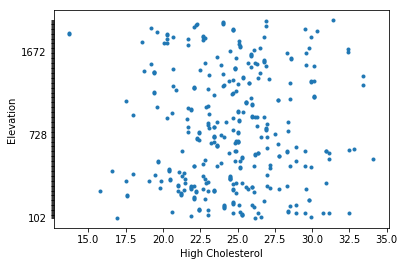

In [20]:
f, ax = plt.subplots()
ax.plot(df_h_atk_elev['High Cholesterol'], df_h_atk_elev['Elevation'], '.')

spacing = 100
visible = ax.yaxis.get_ticklabels()[::spacing]
for label in ax.yaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)

ax.set_xlabel('High Cholesterol')
ax.set_ylabel('Elevation')

- Then we tried to compare city elevation and cholesterol but the graph still shows no correlation between each city's elevation and high cholesterol

Text(0, 0.5, 'Elevation')

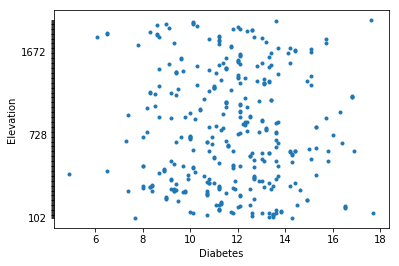

In [21]:
f, ax = plt.subplots()
ax.plot(df_h_atk_elev['Diabetes'], df_h_atk_elev['Elevation'], '.')

spacing = 100
visible = ax.yaxis.get_ticklabels()[::spacing]
for label in ax.yaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)
ax.set_xlabel('Diabetes')
ax.set_ylabel('Elevation')

 - Similar results are shown. This graph shows no correlation between a city's elevation and diabetes

Text(0, 0.5, 'Elevation')

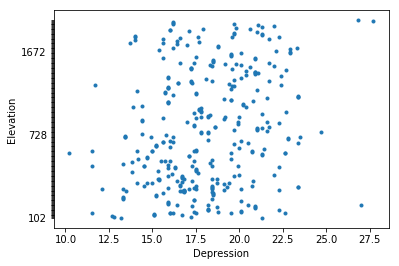

In [22]:
f, ax = plt.subplots()
ax.plot(df_h_atk_elev['Depression'], df_h_atk_elev['Elevation'], '.')

spacing = 100
visible = ax.yaxis.get_ticklabels()[::spacing]
for label in ax.yaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)
ax.set_xlabel('Depression')
ax.set_ylabel('Elevation')

 - This graph shows no correlation between a city's elevation and depression, the points are all over the graph

Text(0, 0.5, 'Elevation')

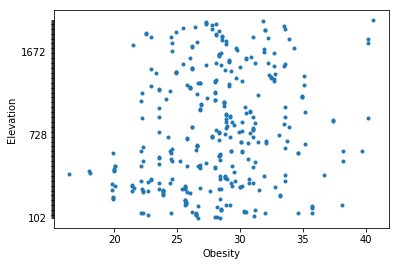

In [23]:
f, ax = plt.subplots()
ax.plot(df_h_atk_elev['Obesity'], df_h_atk_elev['Elevation'], '.')

spacing = 100
visible = ax.yaxis.get_ticklabels()[::spacing]
for label in ax.yaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)
ax.set_xlabel('Obesity')
ax.set_ylabel('Elevation')

 - This graph shows no correlation between a city's elevation and obesity, every elevation has both low and high value of obesity

Text(0.5, 17.200000000000003, 'Percentage with Heart Attack')

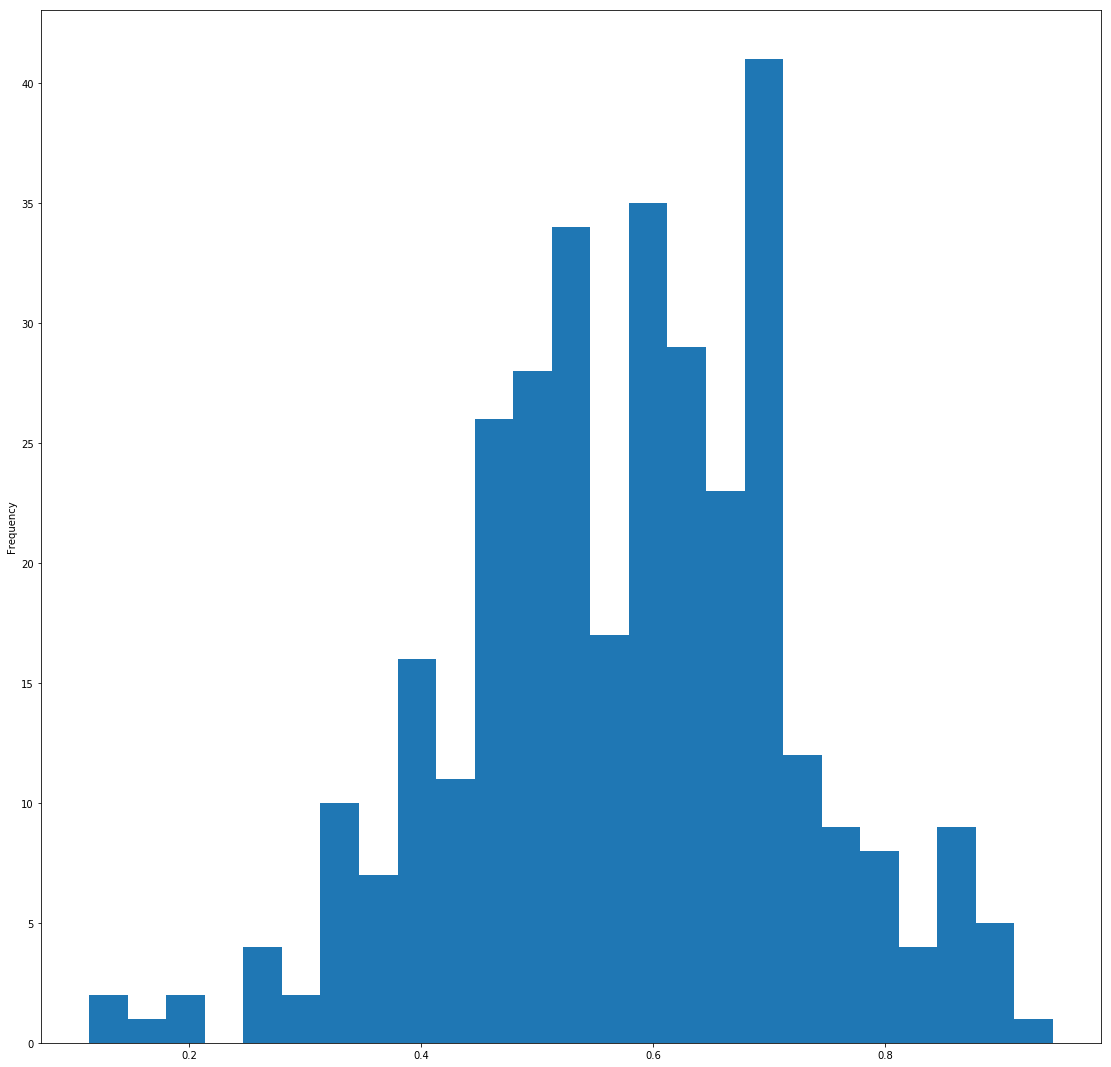

In [27]:
df_h_atk_elev['Percent with Heart Attack 10'] = np.log10(df_h_atk_elev['Percent with Heart Attack'])
df_h_atk_elev['Percent with Heart Attack 10'].plot.hist(bins=25)
ax.set_xlabel('Percentage with Heart Attack')

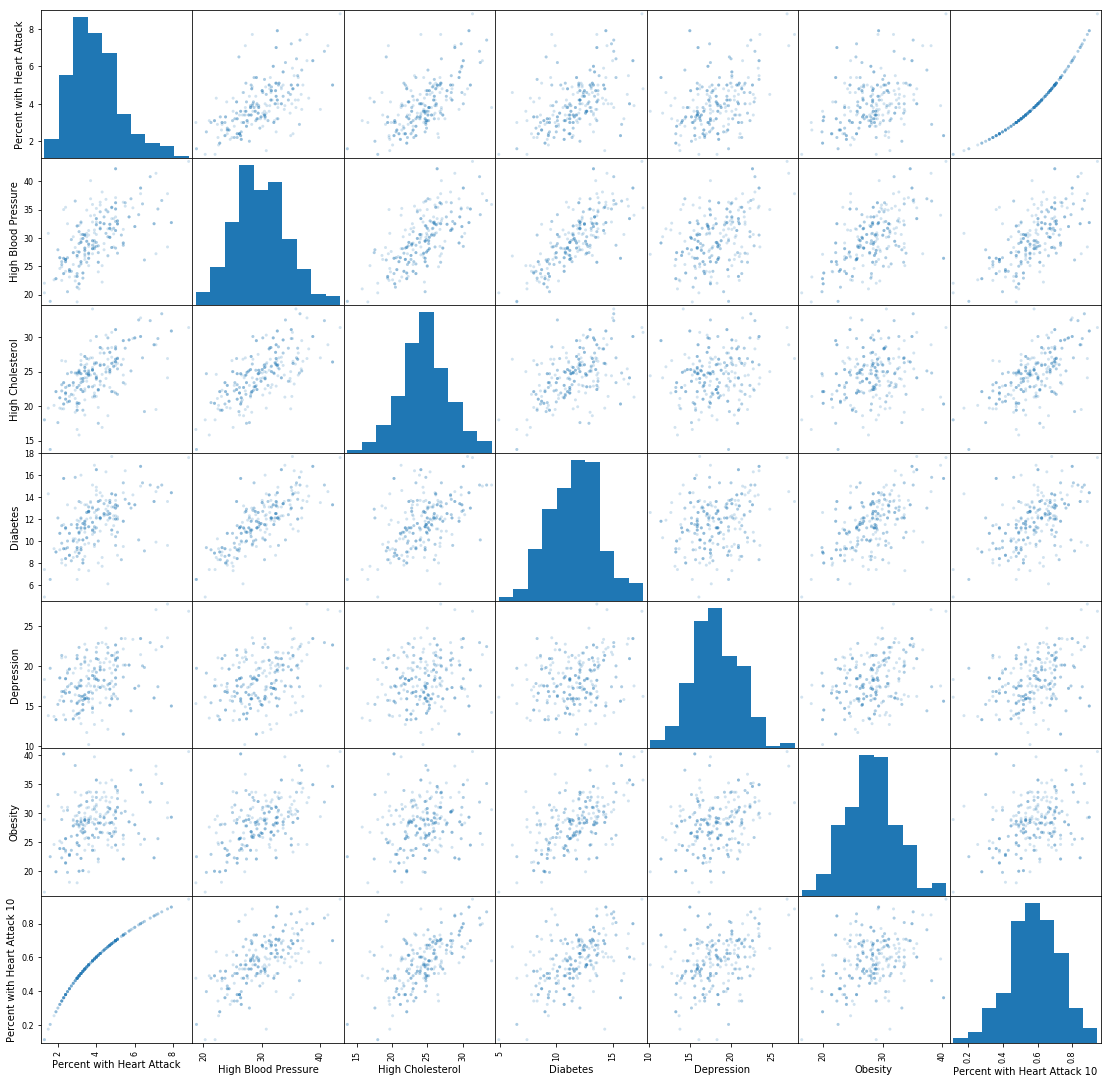

In [28]:
fig = pd.plotting.scatter_matrix(df_h_atk_elev, alpha=0.2)
plt.rcParams['figure.figsize'] = [19, 19]

## Privacy/Ethics Considerations
Our project takes privacy issues very serious and thought about this problem when we first framed the proposal. To be careful and avoid having individual information, our project focuses on the data about city elevation and rate of heart diseases of its citizens. So first of all, cities do not contain any individual’s private information if we only include the data about elevations and states. Second, the data about percent of people having heart attack issues, high blood pressure, high cholesterol, diabetes, depression and obesity are all objective numbers, they do not contain any personal information as well. 

Furthermore, there is not any ethical issues in our project since all the data we collected are irrelevant to any individuals’ private information. Our data collected are percentage numbers that represent the health issues of people in particular cities, so our data or analysis has not exposed any health issues related to individuals. To be more specific, although the data we have are originated from individuals’ health conditions, we do not draw our conclusions based on each individual’s health issues. What we explore is the question about how city elevation affect people’s health issues in general. However, there might be some bias when we first use graphs contain average elevation by states since there are different numbers of cities in each state and each state may contain cities with large differences in elevation. So it is less accurate to use state elevations to predict, city elevations are more suitable data.

## Data Analysis and Results
Using the data that we have so far, we can analyze the correlation between elevation and heart health related diseases by visualizing if there can be a significant best fit regression line in each graph. Not all graphs presented were able to justify having a line of best fit and therefore was deemed as non-correlated. Based on our findings about each graph, we can see that high blood pressure and high cholesterol are the only heart health related disease that has a strong positive correlation to an increased risk of heart attacks. The other heart health related diseases of diabetes, obesity, and depression showed little to no correlation to heart attack percentage. However, when another variable such as elevation is factored in, the data cannot show a correlation. One more thing about our data is that the first six graphs with fewer dots are showing the average elevation by states, whereas the next few graphs with more dots are average elevation by each city. Apparently, based on the displayed correlations, comparing data with each city is more precise because we have more dots and smaller geographical range. Each graph was considered non-correlated when comparing the elevation of each city to each heart health related problem and heart attack percentage. Thus, we can assume that a different elevation does not affect percentage of heart attacks. 

## Conclusion and Discussion
Our null hypothesis for both percentage of heart attacks and heart health related diseases was that there is no correlation against elevation. Performance of significant tests prove that there is not enough evidence to provide whether or not there is a correlation, so we fail to reject the null hypothesis.

Something to note is that our datasets include only a few cities from each state, while each state was included. This means that our dataset did not cover the full range of the United States and thereby only sampling a few cities from each state for our hypothesis. This impacted our overall statistics in that the dataset may not be representative of an accurate demographic of the people. 

